# Solving Schroedinger equation with EDAs

Se convierte en un problema de optimización discretizando la función de onda $\Psi(x)$. Cada solución ($\Psi(x)$) será un vector de m elementos a elegir (discretización), cada elemento representará la amplitud de la función de onda en un punto dado. $\Psi(x)\longrightarrow (a_1, a_2, ..., a_n)$, recordando que la función debe estar normalizada de manera que: $\int|\Psi(x)|²dx = 1$

La ecuación de Schroedinger es: $$\hat{H} | \Psi> = E | \Psi> \quad \longrightarrow \quad
 \left(-\frac{\hbar²}{2\mu}\frac{d²}{dx²} + V(x)\right)\Psi(x) = E | \Psi>$$

Con la función de onda discretizada la derivada segunda se puede calcular así:
$$ \frac{d²}{dx²}\Psi(x_a)=(\Psi(x_{a-1})+\Psi(x_{a+1})-2\Psi(x_{a}))/\Delta x ²$$

Con $\Delta x = (x_i-x_{i-1})$, el espaciado de la coordenada x, que tomaremos constante.

#### One dimensional infinite well. Particle in a box.

Vamos a probar a resolver un problema unidimensional de una partícula de masa m encerrada en una caja de lonigitud L. De manera que el potencial está definido como $$ V(x)= \left\{
\begin{array}{ll}
      0 & 0 < x < L\\
      \infty & elsewhere \\
\end{array} 
\right.  $$

Este problema tiene soluciones analíticas $$ \Psi_n(x) = \sqrt{\frac{2}{L}} \sin\left(\frac{n\pi x}{L}\right) \,\,\,\,,\,\,\,\, E_n = n^2\frac{h^2}{8L^2m} \,\,\,\,,\,\,\,\, n = 1, 2, 3...$$

## Funciones de optimización.
Se proponen varias funciones para optimizar las soluciones, según la lectura de diferentes papers. En todas ellas hay que hacer un *guess* del valor de E, que se puede tomar como 0, ya que primero obtendremos el nivel fundamental de energía.

La primera propuesta de función F a optimizar es: $F = e^{-Z}$ con Z: $$ Z = \frac{\sum_n|(\hat{H}-E)\Psi(x_n)|²}{\sum_n \Psi(x_n)²}$$
El denominador no tiene por qué sumar uno aunque las soluciones estén normalizadas, porque no tenemos la función entera $\Psi(x)$, solo las amplitudes en algunos puntos.Este término procura que las soluciones al problema de optimización sean distintas a la solución trivial $\Psi(x_i) = 0 \forall i$, ya que el si el denominador es 0 Z tiende a inf y por tanto F tiende a 0. La función F es 0 < F < 1 y solo toma el valor 1 cuando $\Psi(x)$ cumple la SE $(\hat{H}-E)|\Psi(x)> = 0$ en cada uno de los n puntos discretizados. Por lo que buscamos **maximizar** la función F.




Entonces la función a optimizar tiene: $$Z = \sum_n \left(\frac{\Psi(x_{n-1})+\Psi(x_{n+1})-2\Psi(x_n)}{2\,\,\Delta x²}+(E-V(x_n))\Psi(x_n)\right)^²/\sum_n \Psi(x_n)²$$ Tomando $\hbar = \mu = 1$ y asumiendo que las soluciones están normalizadas.




In [1]:
import numpy as np
from numpy.linalg import norm
from typing import Union

In [2]:
#Definimos la función de optimización, el código de Vicente minimiza la función, por lo que añadiremos un signo negativo global
#a la función F definida previamente

#De momento vamos a considerar que el vector de entrada x son solo puntos en el intervalo 0 < x < L. La función de onda debe ser 0
#fuera de ese intervalo. La discretización de la función dependerá del numero de dimensiones que definamos en el EDA.
#De manera que estaremos dividiendo el espacio L entre el número de dimensiones. 

# def oneD_well(x: Union[np.array, list]) -> float:
#     '''Particle in an infinite 1 dimensional well from 0 to L. The potential is defined as:
#     V(x) = 0 if 0 < x < L and V(x) = inf elsewhere.
#     States are Psi_n(x) = sqrt(2/L)*sin(n*pi*x/L) with energies E_n = n²*h²/(8*L*2*m)'''
#     #Guess for energy; length of well
#     E=0.19737552409610196; L=5
#     # Valor para almacenar sumatorio de F
#     Z = 0
#     #Valor para almacenar pseudo norma de Psi
#     j = 0
#     n = len(x)  # Get the length of x
#     dx = L/(n-1) #spacing of x coordinate
#     #Tomando m=hbar=1 
#     cons=1*10**(-12)
#     for i in range(n):
#         if i == 0:
#             # For the first element, x[i-1] is undefined, so special arrangement is defined
#             Z = Z + ((x[i] + x[i+2] - 2*x[i+1])/dx**2 /2 + E*x[i])**2
#             j = j + x[i]**2
#         elif i == n - 1:
#             # For the last element, x[i+1] is undefined, the " derivative is equal to the penultimate element
#             Z = Z + ((x[i-1] -2*x[i-1] + x[i-2])/dx**2 /2 + E*x[i])**2
#             j = j + x[i]**2
#         else:
#             Z = Z + ((x[i-1] + x[i+1] - 2*x[i])/dx**2 /2 + E*x[i])**2
#             j = j + x[i]**2

#     F = -np.exp(-cons*Z/j)  # Global minus sign to minimize
#     return Z/j

Prueba de código con solución analítica

In [3]:
# x = (2/5)**0.5*np.sin(np.pi*np.linspace(0, 5, 100)*1/5)
# E=0.19737552409610196; L=5
# # Valor para almacenar sumatorio de F
# Z = 0
# #Valor para almacenar pseudo norma de Psi
# j = 0
# n = len(x)  # Get the length of x
# dx = L/(n-1) #spacing of x coordinate
# #Tomando m=h=1 
# cons=1*10**(-6)
# for i in range(n):
#     if i == 0:
#         # For the first element, x[i-1] is undefined, so special arrangement is defined
        
#         Z = Z + ((x[i] + x[i+2] - 2*x[i+1])/dx**2 /2 + E*x[i])**2
#         j = j + x[i]**2 * dx
#     elif i == n - 1:
#         # For the last element, x[i+1] is undefined, the " derivative is equal to the penultimate element
#         Z = Z + ((x[i-1] -2*x[i-1] + x[i-2])/dx**2 /2 + E*x[i])**2
#         j = j + x[i]**2 * dx
#     else:
#         Z = Z + ((x[i-1] + x[i+1] - 2*x[i])/dx**2 /2 + E*x[i])**2
#         j = j + x[i]**2 * dx

# F = -np.exp(-cons*Z/j)  # Global minus sign to minimize
# print(Z, j, F, Z/j)

Código para optimización según la referencia *Solving the Schrödinger equation with genetic algorithms: a practical approach* Rafael Lahoz-Beltra (2022). No se entiende ya que toma el valor absoluto en la segunda derivada, inicializa los puntos a mano... etc

In [4]:
#Definición de la función de optimización alternativa, basada en referencia
#*Solving the Schrödinger equation with genetic algorithms: a practical approach* Rafael Lahoz-Beltra (2022)
#########################################################
# def oneD_wellBeltra(x:Union[np.array, list]) -> float:
#     # Energy
#     Eigenvalue=0.01
#     n = len(x)  # Get the length of x
#     SumD=[]; SumPsi=[]; Z=0; F=0
#     for j in range(1,n-1):
#         D2 = x[j-1] + x[j+1] - 2 * x[j] #Esto es el valor de la derivada segunda en un punto
#         D = ((D2/2) + x[j] * (Eigenvalue-0))**2 #Valor denominador para un punto concreto
#         SumD.append(D) #Añadimos a la lista el valor de este punto
#         Psi = x[j]**2 #Valor del denominador para punto concreto añadido a lista
#         SumPsi.append(Psi)
    
#     Z = sum(SumD)/sum(SumPsi) #finalmente Z es sumatorio del denominador entre sumatorio del denominador
#     F= -1*np.exp(-Z)# F es la función que hay que minimizar
#     return F

# Función de optimización 1
## Valor esperado E

Según la referencia *Direct solution of Schrödinger equation by genetic algorithm: test cases* by Saha et al. Otra posible elección para la función de optimización sería: $$ Z = \left[\frac{<\Psi|\hat{H}|\Psi>}{<\Psi|\Psi>} - E_l\right]² $$ donde $E_l$ es un límite inferior a la energía y las integrales, del numerador (valor esperado de la energía) y denominador son reemplazadas por cuadraturas (partición de función de onda en n trozos) para integrar la función numéricamente. El elemento dx de la integral es L/n, que con la definición de segunda derivada, que incluye $/\Delta x²$, produce un término global (n/L). Resultando: $$ <\Psi|\hat{H}|\Psi> = \left[\frac{-\hbar²}{2\mu}\frac{n_{máx}}{L}\sum_n \Psi(x_n)[\Psi(x_{n-1})+\Psi(x_{n+1})-2\Psi(x_n)]\right]$$
$$<\Psi|\Psi> = \int \Psi (x) \Psi^*(x) dx  = \Delta x \sum_n \Psi(x_n)² = \frac{L}{n_{máx}} \sum_n \Psi ²(x_n)$$

Y finalmente la función de optimización planteada es: $$F = e^{-Z}$$

Estando F acotada entre (0, 1) alcanzando el óptimo en el el valor 1. Aunque se podría tomar la función Z $(0, \infty)$ simplemente optimizada en el valor 0. El término $<\Psi|\Psi>$ hace que las solución trivial tenga una mala evaluación y se descarta rápidamente. 

In [5]:
#Definición de la función de optimización basada en referencia: Direct solution of Schrödinger equation by genetic algorithm:
#test cases
###############################
def oneD_wellExpE(x:Union[np.array, list]) -> float:
    #Energy_lower bound
    E = 0
    #Well lenght
    L=5
    n = len(x)
    ExpE = 0; j=0
    cons=1*10**(-6)
    if (x[0]< -0.1 or x[0] > 0.1) or (x[n-1]<-0.1 or x[n-1]>0.1):
        F = np.infty
        return F
    
    else:
        for i in range(n):
            if i==0:
                ExpE = ExpE -0.5*((n-1)/L)*(x[i]*(x[i]+x[i+2]-2*x[i+1]))
                j = j + x[i]**2* (L/(n-1))

            elif i==n-1:
                ExpE = ExpE -0.5*((n-1)/L)*(x[i]*(x[i]+x[i-2]-2*x[i-1]))
                j = j + x[i]**2 * (L/(n-1))
                
            else:
                ExpE = ExpE -0.5*((n-1)/L)*(x[i]*(x[i-1]+x[i+1]-2*x[i]))
                j=j+x[i]**2* (L/(n-1))
            
    Z = (ExpE/j - E)**2
    F = -1*np.exp(-cons*Z) #con signo menos global para minimizar
    return Z

Prueba de código con solución analítica

In [6]:
from scipy import constants as cte

x = (2/5)**0.5*np.sin(np.pi*np.linspace(0, 5, 100)*1/5)
n = len(x)
L=5
m=1
ExpE = 0; j=0; E=0.19737552409610196
cons=1*10**(-12)
for i in range(n):
    if i==0:
        ExpE = ExpE -0.5*((n-1)/L)*x[i]*(x[i]+x[i+2]-2*x[i+1])/m
        j = j + x[i]**2* (L/(n-1))

    elif i==n-1:
        ExpE = ExpE -0.5*((n-1)/L)*x[i]*(x[i]+x[i-2]-2*x[i-1])/m
        j = j + x[i]**2 * (L/(n-1))

    else:
        ExpE = ExpE -0.5*((n-1)/L)*x[i]*(x[i-1]+x[i+1]-2*x[i])/m
        j=j+x[i]**2* (L/(n-1))
            
Z = (ExpE/j - E)**2
F = -1*np.exp(-cons*Z) #con signo menos global para minimizar

print(ExpE, j, Z, F)

0.19737552409610196 1.0000000000000004 6.933347799794049e-33 -1.0


Esta definición basada en la exponencial del valor esperado de la energía daba muchos problemas de convergencia. Si simplemente nos limitamos a minimizar el término $ Z = \left[\frac{<\Psi|\hat{H}|\Psi>}{<\Psi|\Psi>} - E_l\right]² $ que está limitado a $(0, \infty)$ también podemos enconctrar la solución cuando ese valor sea 0.

___
***

# Función de optimización 2
## ODE solution

En un paper más antiguo *Applications of Genetic algorithms to the solutions of ODEs* by DA Diver (1993) especifica cómo se debe derivar numéricamente y cómo se resuelve mediante optimización una función tipo: $$a(x) y'' + b(x) y' + c(x) y = 0$$

$$\hat{H}|\Psi> - E |\Psi> = 0 \,\, \longrightarrow \,\, -\frac{1}{2}\Psi''(x) - E \Psi(x) = 0$$

Para encontrar las soluciones proponen varias medidas: $$\epsilon_1 = \sum_i|R_i|; \,\, \epsilon_2 = \prod_i|R_i|; \,\,\, \epsilon_3 = e^\delta -1 \,con\, \delta=|y'-y'^*| ;\,\,\, \epsilon_4 = max(|R_i|)$$ Siendo $R_i$ los residuos resultado de aplicar las definiciones de derivación sobre la ecuación diferencial para el punto $x_i$, de manera que si nuestra $y(x) \longrightarrow y_i=y(x_i) \forall i$ es solución esa cantidad $R_i=0 \forall i$. La cantidad $y'^*$ sería el valor del gradiente sobre un punto definida por el usuario es para obligar a la solución a cumplir las posibles condiciones de contorno sobre y'(x).

El fitness de una solución vendría finalmente dado por: $$F = \alpha \epsilon_1 + \beta \epsilon_2+ \gamma \epsilon_3+ \mu \epsilon_4$$

Habrá que minimizar esta cantidad. El problema así definido encontrará el óptimo con $\Psi(x_i) = 0 \,\, \forall i$. Hemos de añadir un término que castigue a la función si halla la solución trivial. Usamos una variación de $\epsilon_1$ $$\frac{\sum_i|R_i|}{\sum_1^{n-1}|\Psi(x_i)|}$$
Además para satisfacer las condiciones de contorno $\Psi(0)=\Psi(L)=0$ sumamos a los residuos términos $10 |\Psi(0)| + 10 |\Psi(L)|$

In [7]:
from scipy import constants as cte
cte.hbar

1.0545718176461565e-34

In [8]:
#Nueva definición de la función a optimizar basada en la lectura de: GA to solve ODEs.
#No vamos a tener en cuenta el término para la condición de contorno de la derivada. Solo consideramos el
#término eps1 más términos que obligan a cumplir las condiciones de contorno.

def GAtoSE(x:Union[np.array, list]) -> float:
    #Energy lower bound
    E=0.19739208802178715
    #Well length
    L=5
    #Tomamos m=1
    n = len(x)
    dx = L/(n-1) #spacing of x coordinate
    #list to store residuals of each xi
    R=[]
    for i in range (n):
        if i==0:
            r=0.5*((x[i]-2*x[i+1]+x[i+2])/dx**2)+E*x[i]
            R.append(abs(r))
        elif i==n-1:
            r=0.5*((x[i]+x[i-2]-2*x[i-1])/dx**2)+E*x[i]
            R.append(abs(r))
        else:
            r=0.5*((x[i+1]+x[i-1]-2*x[i])/dx**2)+E*x[i]
            R.append(abs(r))
    Rsum=sum(R)
    return (Rsum/sum(abs(x[1:n-1]))+10*abs(x[0])+10*abs(x[-1]))
     

Comprobación código solución analítica

Según la SE, -0.5 * la segunda derivada de la función en cualquier punto, debe ser igual al valor de la función en ese punto multiplicada por la energía. Habiendo tomado $\hbar=m=1$

In [9]:
x = (2/5)**0.5*np.sin(np.pi*np.linspace(0, 5, 1000)*1/5)

#Energy, ground state
E=0.19739208802178715
#Well length
L=5
#Tomamos m=1
n = len(x)
dx = L/(n-1) #spacing of x coordinate
#list to store sD
sD=[]
#list to store E*|psi>
Epsi=[]
#diferencia
Err = []
for i in range (n):
    if i==0:
        r= -0.5*((x[i]-2*x[i+1]+x[i+2])/dx**2)
        sD.append(r)
        Epsi.append(E * x[i])
        Err.append(abs(sD[i]-Epsi[i]))
    elif i==n-1:
        r= -0.5*((x[i]+x[i-2]-2*x[i-1])/dx**2)
        sD.append(r)
        Epsi.append(E * x[i])
        Err.append(abs(sD[i]-Epsi[i]))
    else:
        r= -0.5*((x[i+1]+x[i-1]-2*x[i])/dx**2)
        sD.append(r)
        Epsi.append(E * x[i])
        Err.append(abs(sD[i]-Epsi[i]))
print('El MAE (Mean Absolute Error) entre -0.5 * Psi" y Psi * E es', sum(Err)/n)

El MAE (Mean Absolute Error) entre -0.5 * Psi" y Psi * E es 8.50619266923753e-07


En la referencia *Numerical solution of SE pert or direct by GA* de Pinaki Chaudhury, S.P. Bhattacharyya (1998) como función de optimización usan esto mismo pero:
$$ \theta = (\hat{H} - E) \Psi(x) \,\,\,\,\,,\,\,\,\,\, \sigma = \sqrt{|\theta|²} \newline \newline F = e^{-\sigma}$$

In [10]:
soltest = (2/5)**0.5*np.sin(np.pi*np.linspace(0, 5, 1000)*1/5)
print('Una vez propuestas las funciones de optimización, la solución analítica (soltest) \ndebería ser la que minimizara'
      ' cada una de dichas funciones.\n \n En GAtoSE =',GAtoSE(soltest), '\n' , #'En oneD_well = ', oneD_well(soltest),
        '\n'
      ' En oneD_wellExpE = ', oneD_wellExpE(soltest))


Una vez propuestas las funciones de optimización, la solución analítica (soltest) 
debería ser la que minimizara cada una de dichas funciones.
 
 En GAtoSE = 2.1147545433345336e-06 
 
 En oneD_wellExpE =  0.038963572192605184


In [11]:
oneD_wellExpE(soltest)**0.5

0.19739192534803743

## Niveles de energía válidos
Hemos fijado $m=\hbar=1 \longrightarrow h = 2\pi$ y la longitud del pozo es $L=5$
De manera que los niveles de energía admisibles pasan a ser:
$$E_n = n²\frac{h²}{8mL²} \longrightarrow E_n = n²\frac{(2\pi)^2}{8L²}$$
Con n=1 tenemos el ground state, de manera que podemos escribir:
$$E_g = E_1 = \frac{h²}{8mL²} \longrightarrow E_n = n²\,E_g $$
Y tenemos: $$E_g = 0.1974$$


In [12]:
L=5
Eg = (2*np.pi)**2/(8*L**2*1)
En=[]
for i in range(7):
    e=(i+1)**2*Eg
    En.append(e)
    print(f'E_{i+1} = {e}')

E_1 = 0.19739208802178715
E_2 = 0.7895683520871486
E_3 = 1.7765287921960844
E_4 = 3.1582734083485944
E_5 = 4.934802200544679
E_6 = 7.106115168784338
E_7 = 9.67221231306757


## Discretización función de onda

In [13]:
n_variables = 25 #Es el número de elementos con los que se particiona la función de onda

In [14]:
print(5/(n_variables-1), ' es el tamaño del grid')

0.20833333333333334  es el tamaño del grid


In [15]:
from EDAspy.optimization import UMDAc
from EDAspy.optimization import EGNA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mpcol
import pickle
import os
from pandas.plotting import parallel_coordinates

/home/jcasajus/.virtualenvs/schrodinger/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# EDAs

In [16]:
# qumda = EGNA(size_gen=3000, max_iter=2000, dead_iter=20, n_variables= n_variables, lower_bound=0, upper_bound = 2, parallelize=True, alpha=0.5)
# eda_resultD_well = qumda.minimize(oneD_well, True)
# #No está funcionando sale todo el rato Best cost: -0.0

Puesto que buscamos una función contínua obligamos a la red Bayesiana a aprender arcos entre los puntos consecutivos. Aunque el algoritmo es capaz de hallar la solución sin necesidad de esto, y no hemos comprobado qué arcos aprendía en el proceso sin white list.

In [17]:
whites=[(str(i), str(i+1)) for i in range(n_variables-1)]
whites

[('0', '1'),
 ('1', '2'),
 ('2', '3'),
 ('3', '4'),
 ('4', '5'),
 ('5', '6'),
 ('6', '7'),
 ('7', '8'),
 ('8', '9'),
 ('9', '10'),
 ('10', '11'),
 ('11', '12'),
 ('12', '13'),
 ('13', '14'),
 ('14', '15'),
 ('15', '16'),
 ('16', '17'),
 ('17', '18'),
 ('18', '19'),
 ('19', '20'),
 ('20', '21'),
 ('21', '22'),
 ('22', '23'),
 ('23', '24')]

In [18]:
execute_edas = True

In [19]:
results_dict = {}
objects = ['eda_resultGAtoSE', 'eda_resultExpE', 'eda_resultExpExcitated', 'eda_resultGAtoSEExcitated', 'eda_resultExpExcitated3', 'eda_resultGAtoSEExcitated3', 'eda_resultExpExcitated4']


In [20]:
ruta='Results/OneDwell'

In [21]:
#Cargamos soluciones previas si no se ejecutan los EDAs
if not execute_edas:  
    for key in objects:
            with open(f'{ruta}/{key}.pkl', "rb") as file:
                results_dicts[key] = pickle.load(file)

In [22]:
if execute_edas:
    qumda = EGNA(size_gen=1500, max_iter=100, dead_iter=100, n_variables= n_variables,lower_bound=0, upper_bound = 2, alpha=0.5, parallelize=True, white_list=whites)
    results_dict["eda_resultGAtoSE"] = qumda.minimize(GAtoSE, True)

IT:  0 	Best cost:  999999999999


IT:  1 	Best cost:  10.409286202228582
IT:  2 	Best cost:  10.038211822618909
IT:  3 	Best cost:  8.570373430674326
IT:  4 	Best cost:  6.493604720133634
IT:  5 	Best cost:  4.902972697082511
IT:  6 	Best cost:  4.902972697082511
IT:  7 	Best cost:  3.798995520042942
IT:  8 	Best cost:  3.798995520042942
IT:  9 	Best cost:  3.233430798757567
IT:  10 	Best cost:  3.074415307590775
IT:  11 	Best cost:  2.3309858844109232
IT:  12 	Best cost:  1.9719520257259489
IT:  13 	Best cost:  1.6399505118866433
IT:  14 	Best cost:  1.608501660830041
IT:  15 	Best cost:  1.3476945940561258
IT:  16 	Best cost:  1.1655324427973588
IT:  17 	Best cost:  0.9513989342596096
IT:  18 	Best cost:  0.8451706318011453
IT:  19 	Best cost:  0.7749948849158079
IT:  20 	Best cost:  0.6342250689629665
IT:  21 	Best cost:  0.574450987172589
IT:  22 	Best cost:  0.5093494037835766
IT:  23 	Best cost:  0.4628124110968159
IT:  24 	Best cost:  0.3800755784376301
IT:  25 	Best cost:  0.36960631088485885
IT:  26 	Best cost

In [23]:
if execute_edas:
    qumda = EGNA(size_gen=1500, max_iter=100, dead_iter=100, n_variables= n_variables,lower_bound=0, upper_bound = 2, alpha=0.5, parallelize=True, white_list=whites)
    results_dict["eda_resultExpE"] = qumda.minimize(oneD_wellExpE, True)

IT:  0 	Best cost:  999999999999
IT:  1 	Best cost:  18.537735075433044
IT:  2 	Best cost:  18.537735075433044
IT:  3 	Best cost:  18.537735075433044
IT:  4 	Best cost:  18.537735075433044
IT:  5 	Best cost:  11.663970172937397
IT:  6 	Best cost:  11.663970172937397
IT:  7 	Best cost:  10.290131480734855
IT:  8 	Best cost:  9.252531500743817
IT:  9 	Best cost:  9.252531500743817
IT:  10 	Best cost:  9.252531500743817
IT:  11 	Best cost:  7.42613208841529
IT:  12 	Best cost:  7.42613208841529
IT:  13 	Best cost:  7.42613208841529
IT:  14 	Best cost:  7.42613208841529
IT:  15 	Best cost:  7.42613208841529
IT:  16 	Best cost:  7.42613208841529
IT:  17 	Best cost:  7.42613208841529
IT:  18 	Best cost:  7.42613208841529
IT:  19 	Best cost:  7.42613208841529
IT:  20 	Best cost:  7.42613208841529
IT:  21 	Best cost:  7.42613208841529
IT:  22 	Best cost:  7.42613208841529
IT:  23 	Best cost:  7.42613208841529
IT:  24 	Best cost:  7.42613208841529
IT:  25 	Best cost:  3.3049285020223973
IT:  26

In [24]:
# from EDAspy.optimization import EMNA
# qumda = EMNA(size_gen=50000, max_iter=250, dead_iter=5, n_variables= n_variables, lower_bound=-5, upper_bound = 5, alpha=0.35)
# eda_resultGAtoSEMNA = qumda.minimize(GAtoSE, True)

In [25]:
# from EDAspy.optimization import SPEDA
# qumda = SPEDA(size_gen=50000, max_iter=250, dead_iter=5, n_variables= n_variables, lower_bound=-5, upper_bound = 5, alpha=0.35, l=1)
# eda_resultGAtoSPEDA = qumda.minimize(GAtoSE, True)

In [26]:
np.sin(np.pi/2) #Si está en radianes es 1

1.0

### Normalización soluciones
Una vez halladas las soluciones es necesario normalizarlas de manera que se cumpla la condición:
$\int|\Psi(x)|²dx = 1$ sustituyendo la integral por cuadraturas sobre el grid de puntos.

A continuación **solo se normaliza la última solución** para visualizar el plot estático.


In [27]:
objects = {
 "eda_resultExpE": results_dict['eda_resultExpE'],
 "eda_resultGAtoSE": results_dict['eda_resultGAtoSE'],
 # "eda_resultGAtoSEMNA": eda_resultGAtoSEMNA,
 # "eda_resultGAtoSPEDA": eda_resultGAtoSPEDA,
 #"eda_resultD_well": eda_resultD_well,
}


# Cálculo de las constantes para normalización soluciones
for element in objects.keys():
    integral =0
    for i in range(len(objects[element].sel_inds_hist[-1,0,:-1])):
        integral = integral + (objects[element].sel_inds_hist[-1,0,:-1][i]**2)*(5/(n_variables-1))

    B = (1/integral)**0.5
    objects[element].sel_inds_hist[-1,0,:-1]= B * objects[element].sel_inds_hist[-1,0,:-1]




# integral =0
# for i in range(len(eda_resultGAtoSE.sel_inds_hist[-1,0,:-1])):
# integral = integral + (eda_resultGAtoSE.sel_inds_hist[-1,0,:-1][i]**2)*(5/(n_variables-1))

# B = (1/integral)**0.5

## Valor esperado de Energía de la solución encontrada por la función 1

Una vez que la solución está normalizada el denominador $\lt\Psi|\Psi\gt = 1 $. Habiendo fijado la estimación de la energía $E_l = 0$ el fitness de la solución candidata debería ser simplemente $[\lt \Psi|\hat H|\Psi\gt]^2$ que es el valor esperado de la energía de la solución encontrada elevado al cuadrado.

In [28]:
print('La energía esperada de la solución encontrada es:', results_dict['eda_resultExpE'].sel_inds_hist[-1, 0, -1]**0.5, '\nEl valor teórico es 0.19739208802178715')

La energía esperada de la solución encontrada es: 0.18216083289628457 
El valor teórico es 0.19739208802178715


### Definición funciones analíticas
Solo cambia el número n para cada Psi_n por lo que las definimos de forma genérica.

In [29]:
def Psi_n(n):
    return((2/5)**0.5*np.sin(n*np.pi*np.linspace(0, 5, n_variables)/5))

In [30]:
## Comprobamos que todas las soluciones están normalizadas
for n in [1,2,3,4]:
    int = 0
    for i in range(n_variables):
        int = int + Psi_n(n)[i]**2*(5/(n_variables-1))
    print(f'Int of Psi{n} = {int}')


Int of Psi1 = 1.0
Int of Psi2 = 1.0
Int of Psi3 = 1.0
Int of Psi4 = 1.0


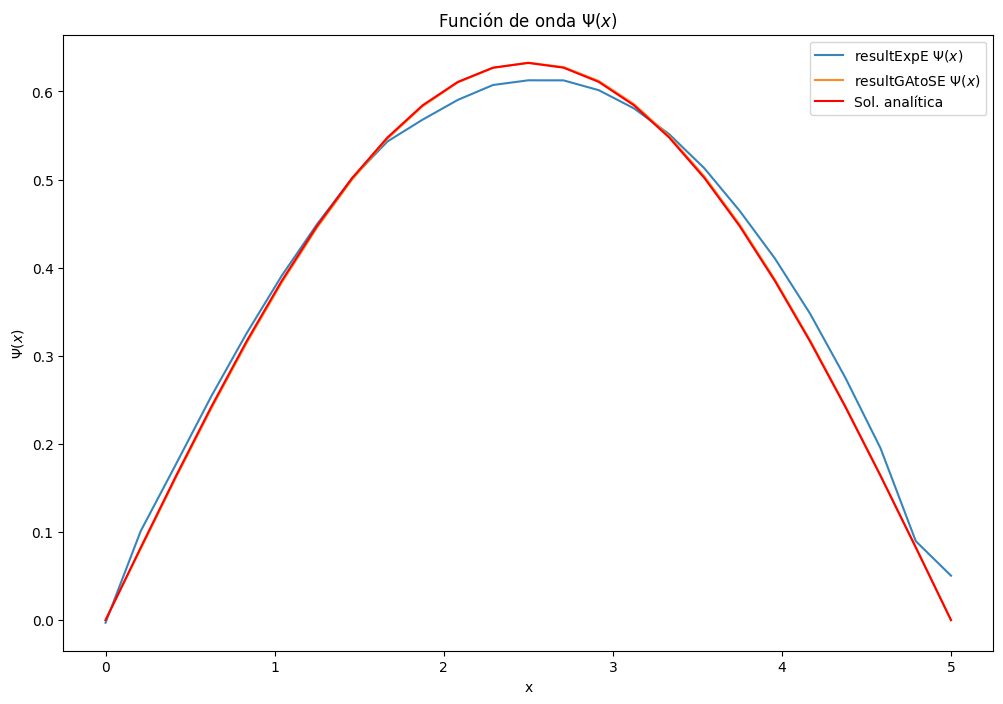

In [31]:
plt.figure(figsize=(12, 8))
for element in objects.keys():
    plt.plot(np.linspace(0, 5, n_variables), objects[element].sel_inds_hist[-1,0,:-1], '-', label=f'{element.split("da_")[1]} $\Psi(x)$', alpha=0.9)

plt.plot(np.linspace(0, 5, n_variables), Psi_n(1), 'r-', label='Sol. analítica')
plt.gca().set_title('Función de onda $\Psi(x)$')
plt.xlabel('x')
plt.gca().set_ylabel(r'$\Psi(x)$')
plt.legend();

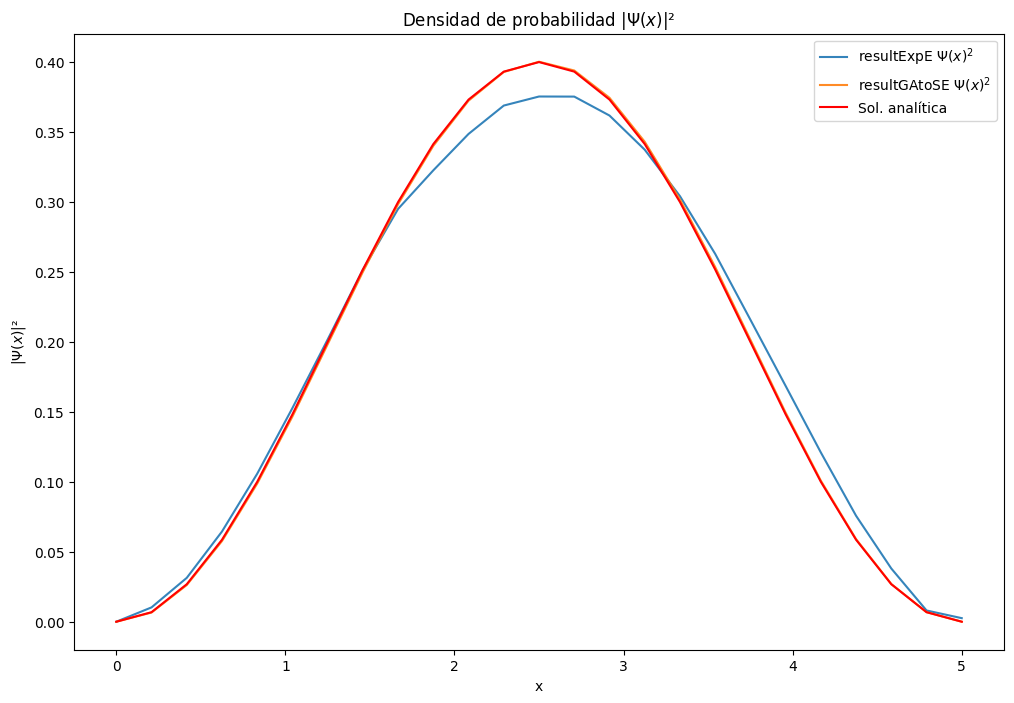

In [32]:
plt.figure(figsize=(12, 8))
for element in objects.keys():
    plt.plot(np.linspace(0, 5, n_variables), objects[element].sel_inds_hist[-1,0,:-1]**2, '-', label=f'{element.split("da_")[1]} $\Psi(x)^2$', alpha=0.9)


plt.plot(np.linspace(0, 5, n_variables), Psi_n(1)**2, 'r-', label='Sol. analítica')
plt.gca().set_title('Densidad de probabilidad $|\Psi(x)|²$')
plt.xlabel('x')
plt.gca().set_ylabel(r'$|\Psi(x)|²$')
plt.legend();

# Estados excitados

Para obtener los siguientes niveles enegéticos basta cambiar las funciones de optmización añadiendo un término que imponga la ortogonalidad entre estados de manera secuencial $<\Psi|\Phi> = 0$ . Ya hemos obtenido el *ground state* $|\Psi$ con su energía.

### Función 1 (valor esperado E)
Añadimos un término a la función Z de esta manera:

$$ Z = \left[\frac{<\Phi|\hat{H}|\Phi>}{<\Phi|\Phi>} - E_l\right]² + \beta |<\Psi|\Phi>|²$$

Donde $|\Psi>$ es el estado fundamental ya calculado, $\beta$ es un factor de castigo de dimensión adecuada, y la energía propuesta la dejamos en el valor anterior

In [33]:
#Definición de la función de optimización basada en referencia: Direct solution of Schrödinger equation by genetic algorithm:
#test cases
###############################
def oneD_wellExpEexcitated(x:Union[np.array, list]) -> float:
    #Energy_lower bound
    E = results_dict['eda_resultExpE'].sel_inds_hist[-1, 0, -1]**0.5
    #Well lenght
    L=5
    n = len(x)
    ExpE = 0; j=0
    #Ortogonal term defs
    beta = 10
    orto=0
    #cons=1*10**(-6)
    if (x[0]< -0.1 or x[0] > 0.1) or (x[n-1]<-0.1 or x[n-1]>0.1):
        F = np.infty
        return F
    
    else:
        for i in range(n):
            if i==0:
                ExpE = ExpE -0.5*((n-1)/L)*(x[i]*(x[i]+x[i+2]-2*x[i+1]))
                j = j + x[i]**2* (L/(n-1))
                orto = orto + x[i]*results_dict['eda_resultExpE'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))


            elif i==n-1:
                ExpE = ExpE -0.5*((n-1)/L)*(x[i]*(x[i]+x[i-2]-2*x[i-1]))
                j = j + x[i]**2 * (L/(n-1))
                orto = orto + x[i]*results_dict['eda_resultExpE'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))
                
            else:
                ExpE = ExpE -0.5*((n-1)/L)*(x[i]*(x[i-1]+x[i+1]-2*x[i]))
                j=j+x[i]**2* (L/(n-1))
                orto = orto + x[i]*results_dict['eda_resultExpE'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))
            
    Z = (ExpE/j - E)**2 + beta* orto**2
    #F = -1*np.exp(-cons*Z) #con signo menos global para minimizar
    return Z

## Función 2 ODE

Para calcular los estados excitados con esta función añadimos un término de castigo para encontrar estados ortogonales, de la misma manera $ \beta |<\Psi|\Phi>|²$


In [34]:
def GAtoSEexcitated(x:Union[np.array, list]) -> float:
    #Energy lower bound
    E=0.19739208802178715
    #Well length
    L=5
    #Tomamos m=1
    n = len(x)
    dx = L/(n-1) #spacing of x coordinate
    #list to store residuals of each xi
    R=[]
    #ortogonal terms
    orto = 0
    for i in range (n):
        if i==0:
            r=0.5*((x[i]-2*x[i+1]+x[i+2])/dx**2)+E*x[i]
            R.append(abs(r))
            orto = orto + x[i]*results_dict['eda_resultGAtoSE'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))

        elif i==n-1:
            r=0.5*((x[i]+x[i-2]-2*x[i-1])/dx**2)+E*x[i]
            R.append(abs(r))
            orto = orto + x[i]*results_dict['eda_resultGAtoSE'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))
        else:
            r=0.5*((x[i+1]+x[i-1]-2*x[i])/dx**2)+E*x[i]
            R.append(abs(r))
            orto = orto + x[i]*results_dict['eda_resultGAtoSE'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))
            
    Rsum=sum(R)
    return (Rsum/sum(abs(x[1:n-1]))+10*abs(x[0])+10*abs(x[-1])+10*orto**2)
     

In [35]:
if execute_edas:
    qumda = EGNA(size_gen=1500, max_iter=120, dead_iter=120, n_variables= n_variables,lower_bound=-2, upper_bound = 2, alpha=0.6, parallelize=True, white_list=whites)
    results_dict['eda_resultExpExcitated'] = qumda.minimize(oneD_wellExpEexcitated, True)

    qumda = EGNA(size_gen=1500, max_iter=120, dead_iter=120, n_variables= n_variables,lower_bound=-2, upper_bound = 2, alpha=0.6, parallelize=True, white_list=whites)
    results_dict['eda_resultGAtoSEExcitated'] = qumda.minimize(GAtoSEexcitated, True)

IT:  0 	Best cost:  999999999999
IT:  1 	Best cost:  252.61271727254402
IT:  2 	Best cost:  252.61271727254402
IT:  3 	Best cost:  252.61271727254402
IT:  4 	Best cost:  252.61271727254402
IT:  5 	Best cost:  252.61271727254402
IT:  6 	Best cost:  252.61271727254402
IT:  7 	Best cost:  252.61271727254402
IT:  8 	Best cost:  252.61271727254402
IT:  9 	Best cost:  252.61271727254402
IT:  10 	Best cost:  252.61271727254402
IT:  11 	Best cost:  167.6575825908464
IT:  12 	Best cost:  167.6575825908464
IT:  13 	Best cost:  167.6575825908464
IT:  14 	Best cost:  167.6575825908464
IT:  15 	Best cost:  167.6575825908464
IT:  16 	Best cost:  167.6575825908464
IT:  17 	Best cost:  146.1395860629234
IT:  18 	Best cost:  146.1395860629234
IT:  19 	Best cost:  133.16520307036464
IT:  20 	Best cost:  133.16520307036464
IT:  21 	Best cost:  133.16520307036464
IT:  22 	Best cost:  133.16520307036464
IT:  23 	Best cost:  133.16520307036464
IT:  24 	Best cost:  133.16520307036464
IT:  25 	Best cost:  133

In [36]:
print('La energía esperada de la solución n=2 encontrada es:', results_dict['eda_resultExpE'].sel_inds_hist[-1, 0, -1]**0.5+results_dict['eda_resultExpExcitated'].sel_inds_hist[-1,0,-1]**0.5 , f'\nEl valor teórico es {En[1]}')

La energía esperada de la solución n=2 encontrada es: 0.8693639928594588 
El valor teórico es 0.7895683520871486


In [37]:
objects = {
 "eda_resultExpExcitated": results_dict['eda_resultExpExcitated'],
 "eda_resultGAtoSExcitated": results_dict['eda_resultGAtoSEExcitated'],
 # "eda_resultGAtoSEMNA": eda_resultGAtoSEMNA,
 # "eda_resultGAtoSPEDA": eda_resultGAtoSPEDA,
 #"eda_resultD_well": eda_resultD_well,
}


# Cálculo de las constantes para normalización soluciones
for element in objects.keys():
    integral =0
    for i in range(len(objects[element].sel_inds_hist[-1,0,:-1])):
        integral = integral + (objects[element].sel_inds_hist[-1,0,:-1][i]**2)*(5/(n_variables-1))

    B = (1/integral)**0.5
    objects[element].sel_inds_hist[-1,0,:-1]= B * objects[element].sel_inds_hist[-1,0,:-1]

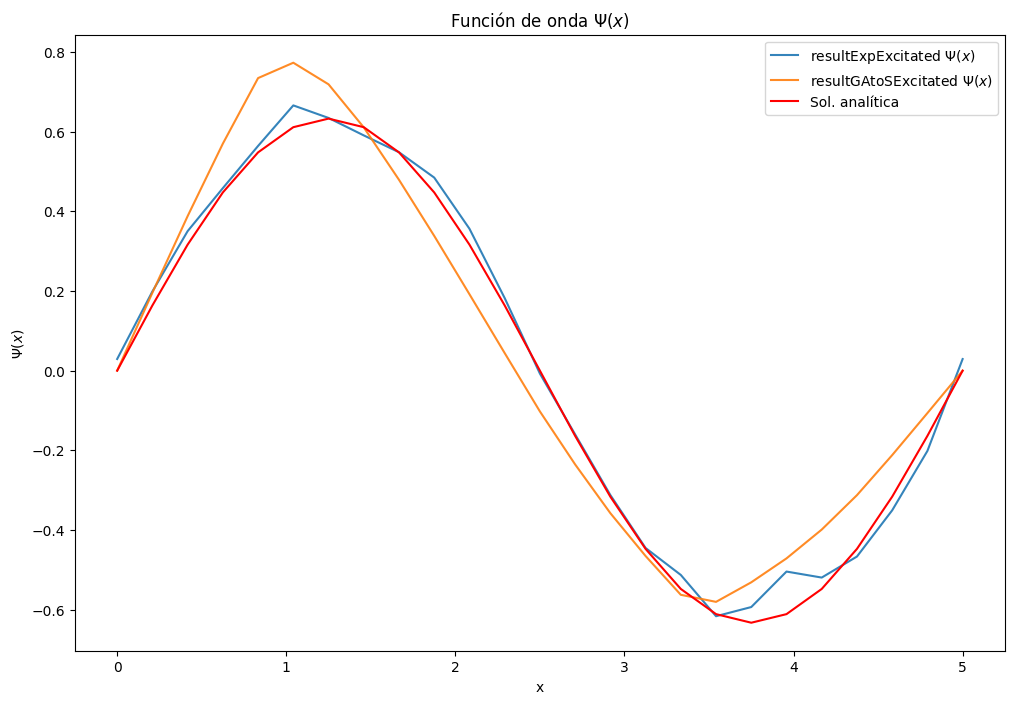

In [38]:
plt.figure(figsize=(12, 8))
for element in objects.keys():
    plt.plot(np.linspace(0, 5, n_variables), objects[element].sel_inds_hist[-1,0,:-1], '-', label=f'{element.split("da_")[1]} $\Psi(x)$', alpha=0.9)

plt.plot(np.linspace(0, 5, n_variables), Psi_n(2) if results_dict['eda_resultExpExcitated'].sel_inds_hist[-1, 0, 10] > 0 else -Psi_n(2), 'r-', label='Sol. analítica')
plt.gca().set_title('Función de onda $\Psi(x)$')
plt.xlabel('x')
plt.gca().set_ylabel(r'$\Psi(x)$')
plt.legend();

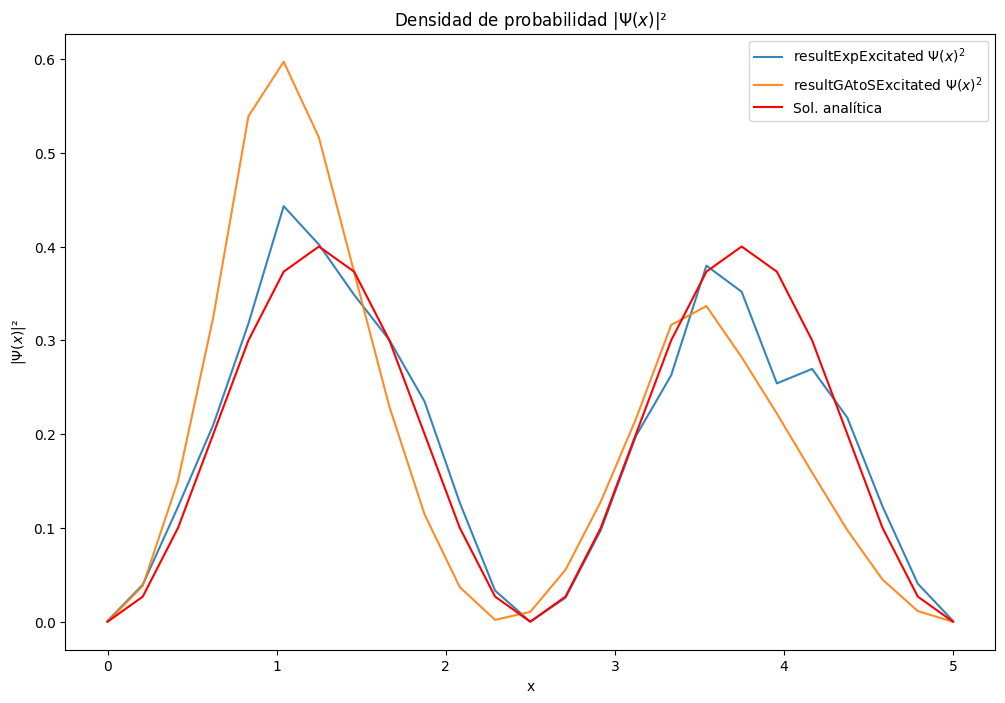

In [39]:
plt.figure(figsize=(12, 8))
for element in objects.keys():
    plt.plot(np.linspace(0, 5, n_variables), objects[element].sel_inds_hist[-1,0,:-1]**2, '-', label=f'{element.split("da_")[1]} $\Psi(x)^2$', alpha=0.9)

plt.plot(np.linspace(0, 5, n_variables), Psi_n(2)**2, 'r-', label='Sol. analítica')
plt.gca().set_title('Densidad de probabilidad $|\Psi(x)|²$')
plt.xlabel('x')
plt.gca().set_ylabel(r'$|\Psi(x)|²$')
plt.legend();

## Estado excitado n=3
Vamos a obtener el siguiente estado excitado, de manera similar, imponiendo ortogonalidad sobre el estado n=2

In [40]:
def oneD_wellExpEexcitated3(x:Union[np.array, list]) -> float:
    #Energy_lower bound
    E = (results_dict['eda_resultExpExcitated'].sel_inds_hist[-1, 0, -1]**0.5 + results_dict['eda_resultExpE'].sel_inds_hist[-1, 0, -1]**0.5)
    #Well lenght
    L=5
    n = len(x)
    ExpE = 0; j=0
    #Ortogonal term defs
    beta = 10
    orto=0; orto2 = 0
    #cons=1*10**(-6)
    if (x[0]< -0.1 or x[0] > 0.1) or (x[n-1]<-0.1 or x[n-1]>0.1):
        F = np.infty
        return F
    
    else:
        for i in range(n):
            if i==0:
                ExpE = ExpE -0.5*((n-1)/L)*(x[i]*(x[i]+x[i+2]-2*x[i+1]))
                j = j + x[i]**2* (L/(n-1))
                orto = orto + x[i]*results_dict['eda_resultExpExcitated'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))
                orto2 = orto2 + x[i]*results_dict['eda_resultExpE'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))


            elif i==n-1:
                ExpE = ExpE -0.5*((n-1)/L)*(x[i]*(x[i]+x[i-2]-2*x[i-1]))
                j = j + x[i]**2 * (L/(n-1))
                orto = orto + x[i]*results_dict['eda_resultExpExcitated'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))
                orto2 = orto2 + x[i]*results_dict['eda_resultExpE'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))
                
            else:
                ExpE = ExpE -0.5*((n-1)/L)*(x[i]*(x[i-1]+x[i+1]-2*x[i]))
                j=j+x[i]**2* (L/(n-1))
                orto = orto + x[i]*results_dict['eda_resultExpExcitated'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))
                orto2 = orto2 + x[i]*results_dict['eda_resultExpE'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))
            
    Z = (ExpE/j - E)**2 + beta* orto**2 + beta * orto2**2
    #F = -1*np.exp(-cons*Z) #con signo menos global para minimizar
    return Z

In [41]:
def GAtoSEexcitated3(x:Union[np.array, list]) -> float:
    #Energy lower bound
    E=1
    #Well length
    L=5
    #Tomamos m=1
    n = len(x)
    dx = L/(n-1) #spacing of x coordinate
    #list to store residuals of each xi
    R=[]
    #ortogonal terms to previous states
    orto = 0; orto2 = 0
    for i in range (n):
        if i==0:
            r=0.5*((x[i]-2*x[i+1]+x[i+2])/dx**2)+E*x[i]
            R.append(abs(r))
            orto = orto + x[i]*results_dict['eda_resultGAtoSEExcitated'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))
            orto2 = orto2 + x[i]*results_dict['eda_resultGAtoSE'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))

        elif i==n-1:
            r=0.5*((x[i]+x[i-2]-2*x[i-1])/dx**2)+E*x[i]
            R.append(abs(r))
            orto = orto + x[i]*results_dict['eda_resultGAtoSEExcitated'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))
            orto2 = orto2 + x[i]*results_dict['eda_resultGAtoSE'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))
            
        else:
            r=0.5*((x[i+1]+x[i-1]-2*x[i])/dx**2)+E*x[i]
            R.append(abs(r))
            orto = orto + x[i]*results_dict['eda_resultGAtoSEExcitated'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))
            orto2 = orto2 + x[i]*results_dict['eda_resultGAtoSE'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))
            
    Rsum=sum(R)
    return (Rsum/sum(abs(x[1:n-1]))+10*abs(x[0])+10*abs(x[-1])+10*orto**2+10*orto2**2)

In [42]:
if execute_edas: 
    qumda = EGNA(size_gen=1500, max_iter=120, dead_iter=120, n_variables= n_variables,lower_bound=-2, upper_bound = 2, alpha=0.6, parallelize=True, white_list=whites)
    results_dict['eda_resultExpExcitated3'] = qumda.minimize(oneD_wellExpEexcitated3, True)
    qumda = EGNA(size_gen=1500, max_iter=120, dead_iter=120, n_variables= n_variables,lower_bound=-2, upper_bound = 2, alpha=0.6, parallelize=True, white_list=whites)
    results_dict['eda_resultGAtoSEExcitated3'] = qumda.minimize(GAtoSEexcitated3, True)
   

IT:  0 	Best cost:  999999999999


IT:  1 	Best cost:  270.5836134130881
IT:  2 	Best cost:  270.5836134130881
IT:  3 	Best cost:  121.96625614196813
IT:  4 	Best cost:  113.65633644482676
IT:  5 	Best cost:  113.65633644482676
IT:  6 	Best cost:  113.65633644482676
IT:  7 	Best cost:  113.65633644482676
IT:  8 	Best cost:  113.65633644482676
IT:  9 	Best cost:  113.65633644482676
IT:  10 	Best cost:  113.65633644482676
IT:  11 	Best cost:  113.65633644482676
IT:  12 	Best cost:  113.65633644482676
IT:  13 	Best cost:  113.65633644482676
IT:  14 	Best cost:  113.65633644482676
IT:  15 	Best cost:  113.65633644482676
IT:  16 	Best cost:  113.65633644482676
IT:  17 	Best cost:  113.65633644482676
IT:  18 	Best cost:  113.65633644482676
IT:  19 	Best cost:  100.85496134450523
IT:  20 	Best cost:  100.85496134450523
IT:  21 	Best cost:  100.85496134450523
IT:  22 	Best cost:  72.67231125222965
IT:  23 	Best cost:  70.98749612792498
IT:  24 	Best cost:  46.11396884120135
IT:  25 	Best cost:  34.661216519031065
IT:  26 	Best 

In [43]:
print('La energía esperada de la solución n=3 encontrada es:', results_dict['eda_resultExpE'].sel_inds_hist[-1, 0, -1]**0.5+results_dict['eda_resultExpExcitated'].sel_inds_hist[-1,0,-1]**0.5+results_dict['eda_resultExpExcitated3'].sel_inds_hist[-1, 0, -1]**0.5 , f'\nEl valor teórico es {En[2]}')

La energía esperada de la solución n=3 encontrada es: 1.7293681548206763 
El valor teórico es 1.7765287921960844


In [44]:
objects = {
 "eda_resultExpExcitated3": results_dict['eda_resultExpExcitated3'],
 "eda_resultGAtoSExcitated3": results_dict['eda_resultGAtoSEExcitated3'],
 # "eda_resultGAtoSEMNA": eda_resultGAtoSEMNA,
 # "eda_resultGAtoSPEDA": eda_resultGAtoSPEDA,
 #"eda_resultD_well": eda_resultD_well,
}


# Cálculo de las constantes para normalización soluciones
for element in objects.keys():
    integral =0
    for i in range(len(objects[element].sel_inds_hist[-1,0,:-1])):
        integral = integral + (objects[element].sel_inds_hist[-1,0,:-1][i]**2)*(5/(n_variables-1))

    B = (1/integral)**0.5
    objects[element].sel_inds_hist[-1,0,:-1]= B * objects[element].sel_inds_hist[-1,0,:-1]

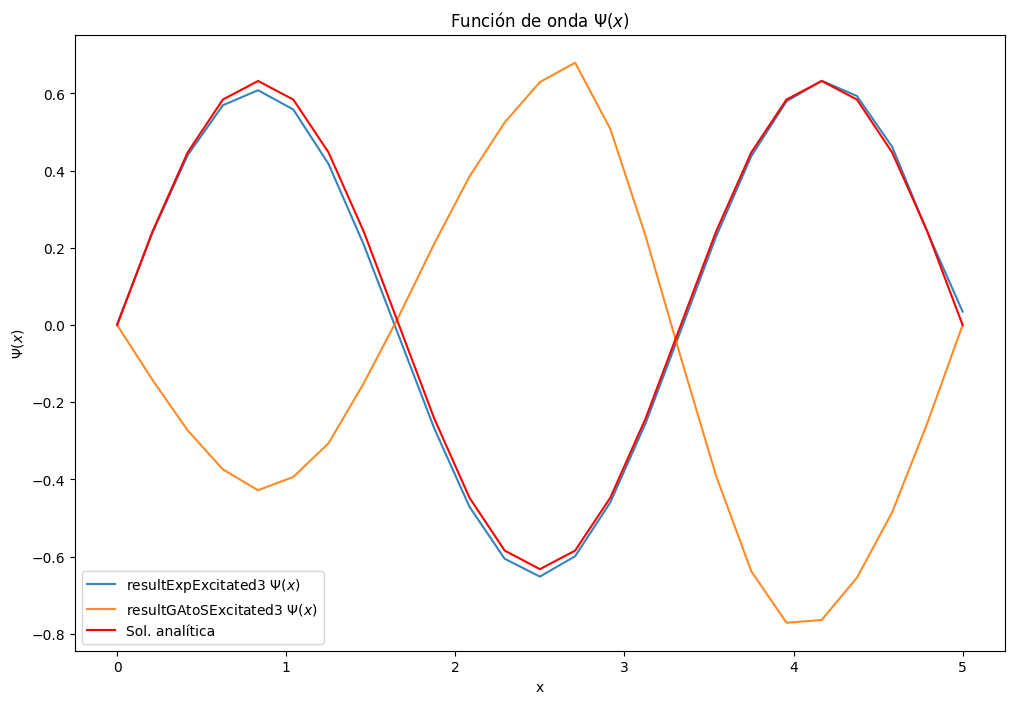

In [45]:
plt.figure(figsize=(12, 8))
for element in objects.keys():
    plt.plot(np.linspace(0, 5, n_variables), objects[element].sel_inds_hist[-1,0,:-1], '-', label=f'{element.split("da_")[1]} $\Psi(x)$', alpha=0.9)

plt.plot(np.linspace(0, 5, n_variables), Psi_n(3) if results_dict['eda_resultExpExcitated3'].sel_inds_hist[-1, 0, 4] > 0 else -Psi_n(3), 'r-', label='Sol. analítica')
plt.gca().set_title('Función de onda $\Psi(x)$')
plt.xlabel('x')
plt.gca().set_ylabel(r'$\Psi(x)$')
plt.legend();

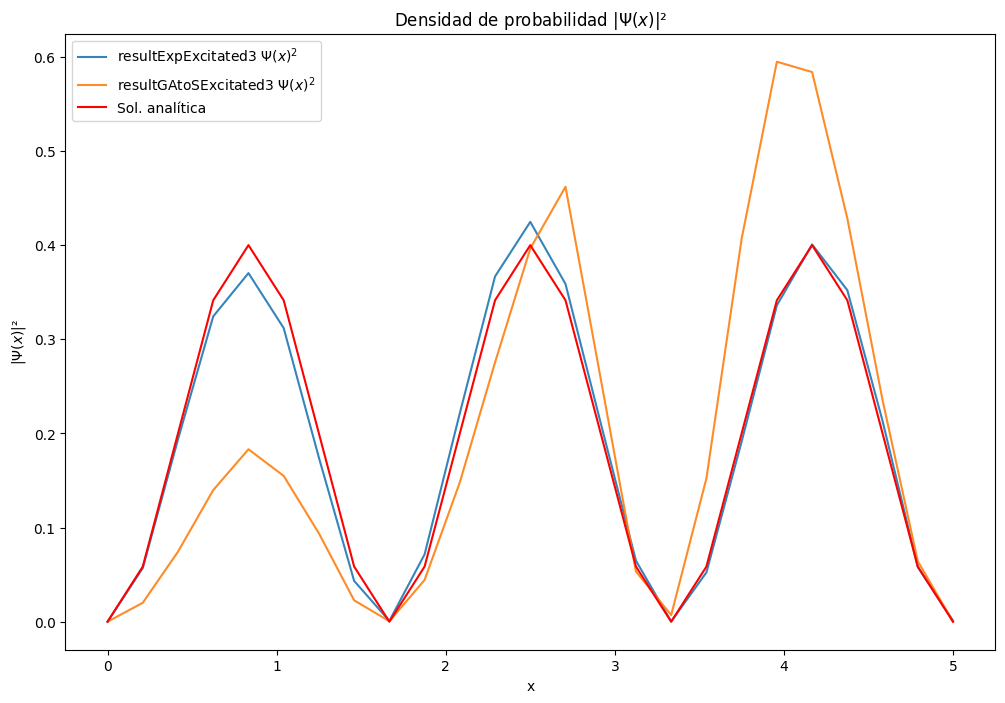

In [46]:
plt.figure(figsize=(12, 8))
for element in objects.keys():
    plt.plot(np.linspace(0, 5, n_variables), objects[element].sel_inds_hist[-1,0,:-1]**2, '-', label=f'{element.split("da_")[1]} $\Psi(x)^2$', alpha=0.9)


plt.plot(np.linspace(0, 5, n_variables), Psi_n(3)**2, 'r-', label='Sol. analítica')
plt.gca().set_title('Densidad de probabilidad $|\Psi(x)|²$')
plt.xlabel('x')
plt.gca().set_ylabel(r'$|\Psi(x)|²$')
plt.legend();

## Estado excitado n=4

De momento pruebo solo con la función que utiliza el valor esperado de la energia, ya que está devolviendo los mejores resultados.

In [47]:
def oneD_wellExpEexcitated4(x:Union[np.array, list]) -> float:
    #Energy_lower bound
    E = (results_dict['eda_resultExpExcitated'].sel_inds_hist[-1, 0, -1]**0.5 + results_dict['eda_resultExpE'].sel_inds_hist[-1, 0, -1]**0.5 +results_dict['eda_resultExpExcitated3'].sel_inds_hist[-1,0,-1]**0.5)
    #Well lenght
    L=5
    n = len(x)
    ExpE = 0; j=0
    #Ortogonal term defs
    beta = 10
    orto=0; orto2 = 0; orto3=0
    #cons=1*10**(-6)
    if (x[0]< -0.1 or x[0] > 0.1) or (x[n-1]<-0.1 or x[n-1]>0.1):
        F = np.infty
        return F
    
    else:
        for i in range(n):
            if i==0:
                ExpE = ExpE -0.5*((n-1)/L)*(x[i]*(x[i]+x[i+2]-2*x[i+1]))
                j = j + x[i]**2* (L/(n-1))
                orto3 = orto3 + x[i]*results_dict['eda_resultExpExcitated3'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))
                orto = orto + x[i]*results_dict['eda_resultExpE'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))
                orto2 = orto2 + x[i]*results_dict['eda_resultExpExcitated'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))


            elif i==n-1:
                ExpE = ExpE -0.5*((n-1)/L)*(x[i]*(x[i]+x[i-2]-2*x[i-1]))
                j = j + x[i]**2 * (L/(n-1))
                orto3 = orto3 + x[i]*results_dict['eda_resultExpExcitated3'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))
                orto = orto + x[i]*results_dict['eda_resultExpE'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))
                orto2 = orto2 + x[i]*results_dict['eda_resultExpExcitated'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))
                
            else:
                ExpE = ExpE -0.5*((n-1)/L)*(x[i]*(x[i-1]+x[i+1]-2*x[i]))
                j=j+x[i]**2* (L/(n-1))
                orto3 = orto3 + x[i]*results_dict['eda_resultExpExcitated3'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))
                orto = orto + x[i]*results_dict['eda_resultExpE'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))
                orto2 = orto2 + x[i]*results_dict['eda_resultExpExcitated'].sel_inds_hist[-1,0,:-1][i]*(L/(n-1))
            
    Z = (ExpE/j - E)**2 + beta* orto**2 + beta * orto2**2 + beta* orto3**2
    #F = -1*np.exp(-cons*Z) #con signo menos global para minimizar
    return Z

In [48]:
if execute_edas:
    qumda = EGNA(size_gen=1500, max_iter=120, dead_iter=120, n_variables= n_variables,lower_bound=-2, upper_bound = 2, alpha=0.6, parallelize=True, white_list=whites)
    results_dict['eda_resultExpExcitated4'] = qumda.minimize(oneD_wellExpEexcitated4, True)

IT:  0 	Best cost:  999999999999
IT:  1 	Best cost:  277.15998127561863
IT:  2 	Best cost:  263.0859022544746
IT:  3 	Best cost:  263.0859022544746
IT:  4 	Best cost:  218.5251213854821
IT:  5 	Best cost:  218.5251213854821
IT:  6 	Best cost:  218.5251213854821
IT:  7 	Best cost:  218.5251213854821
IT:  8 	Best cost:  218.5251213854821
IT:  9 	Best cost:  142.0730421393615
IT:  10 	Best cost:  142.0730421393615
IT:  11 	Best cost:  142.0730421393615
IT:  12 	Best cost:  142.0730421393615
IT:  13 	Best cost:  142.0730421393615
IT:  14 	Best cost:  142.0730421393615
IT:  15 	Best cost:  142.0730421393615
IT:  16 	Best cost:  142.0730421393615
IT:  17 	Best cost:  142.0730421393615
IT:  18 	Best cost:  142.0730421393615
IT:  19 	Best cost:  142.0730421393615
IT:  20 	Best cost:  142.0730421393615
IT:  21 	Best cost:  117.56982690129344
IT:  22 	Best cost:  117.56982690129344
IT:  23 	Best cost:  117.56982690129344
IT:  24 	Best cost:  98.60464917102728
IT:  25 	Best cost:  81.818890025749

In [49]:
print('La energía esperada de la solución n=4 encontrada es:', results_dict['eda_resultExpE'].sel_inds_hist[-1, 0, -1]**0.5+results_dict['eda_resultExpExcitated'].sel_inds_hist[-1,0,-1]**0.5+results_dict['eda_resultExpExcitated3'].sel_inds_hist[-1, 0, -1]**0.5+results_dict['eda_resultExpExcitated4'].sel_inds_hist[-1,0,-1]**0.5 , f'\nEl valor teórico es {En[3]}')

La energía esperada de la solución n=4 encontrada es: 3.119459149112406 
El valor teórico es 3.1582734083485944


In [50]:
objects = {
 "eda_resultExpExcitated4": results_dict['eda_resultExpExcitated4'],
 #"eda_resultGAtoSExcitated3": eda_resultGAtoSEExcitated3,
 # "eda_resultGAtoSEMNA": eda_resultGAtoSEMNA,
 # "eda_resultGAtoSPEDA": eda_resultGAtoSPEDA,
 #"eda_resultD_well": eda_resultD_well,
}


# Cálculo de las constantes para normalización soluciones
for element in objects.keys():
    integral =0
    for i in range(len(objects[element].sel_inds_hist[-1,0,:-1])):
        integral = integral + (objects[element].sel_inds_hist[-1,0,:-1][i]**2)*(5/(n_variables-1))

    B = (1/integral)**0.5
    objects[element].sel_inds_hist[-1,0,:-1]= B * objects[element].sel_inds_hist[-1,0,:-1]

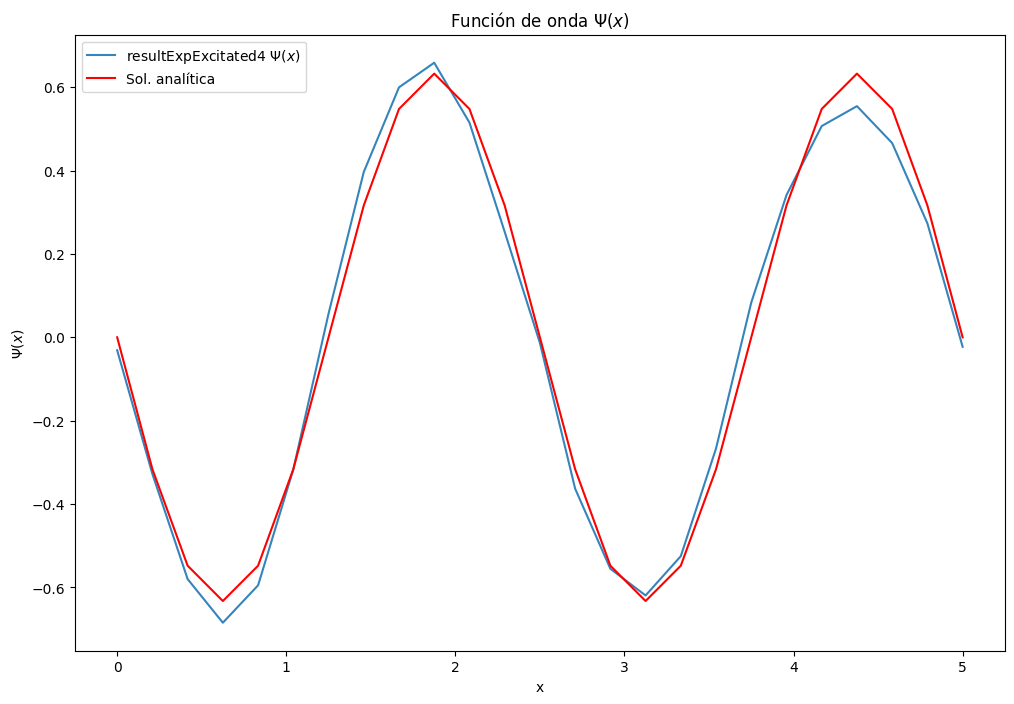

In [51]:
plt.figure(figsize=(12, 8))
for element in objects.keys():
    plt.plot(np.linspace(0, 5, n_variables), objects[element].sel_inds_hist[-1,0,:-1], '-', label=f'{element.split("da_")[1]} $\Psi(x)$', alpha=0.9)

plt.plot(np.linspace(0, 5, n_variables), Psi_n(4) if results_dict['eda_resultExpExcitated4'].sel_inds_hist[-1, 0, 4] > 0 else -Psi_n(4), 'r-', label='Sol. analítica')
plt.gca().set_title('Función de onda $\Psi(x)$')
plt.xlabel('x')
plt.gca().set_ylabel(r'$\Psi(x)$')
plt.legend();

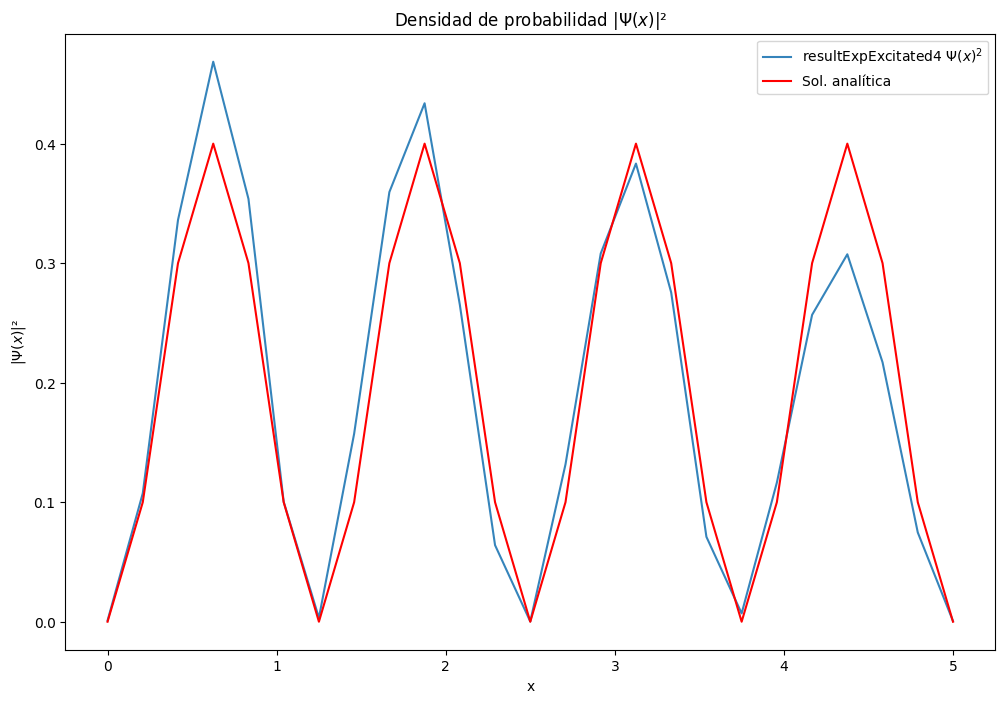

In [52]:
plt.figure(figsize=(12, 8))
for element in objects.keys():
    plt.plot(np.linspace(0, 5, n_variables), objects[element].sel_inds_hist[-1,0,:-1]**2, '-', label=f'{element.split("da_")[1]} $\Psi(x)^2$', alpha=0.9)

plt.plot(np.linspace(0, 5, n_variables), Psi_n(4)**2, 'r-', label='Sol. analítica')
plt.gca().set_title('Densidad de probabilidad $|\Psi(x)|²$')
plt.xlabel('x')
plt.gca().set_ylabel(r'$|\Psi(x)|²$')
plt.legend();

### Guardar soluciones
Si se han ejecutado los EDAs se sobreescriben

In [53]:
objects = ['eda_resultGAtoSE', 'eda_resultExpE', 'eda_resultExpExcitated', 'eda_resultGAtoSEExcitated', 'eda_resultExpExcitated3', 'eda_resultGAtoSEExcitated3', 'eda_resultExpExcitated4']

In [54]:
if execute_edas:
    if not os.path.exists(ruta):
        os.makedirs(ruta)
    for key in results_dict:
        with open(f'{ruta}/{key}.pkl', "wb") as file:
            pickle.dump(results_dict[key], file)

AttributeError: module 'os' has no attribute 'exists'

Parece que la función de optimización con el valor esperado de la energía funciona, y no identifico el error (si lo hay) en la función que calcula residuos.

## Visualización soluciones
Representar la mejor solución en cada iteración en ventanas sucesivas... por ejemplo


### Normalización soluciones
Normalizamos todas las soluciones para todos los niveles energéticos calculados. $\int|\Psi(x)|²dx = 1$

In [ ]:
Nresults_dict = {}
for key in results_dict.keys():
    shape = (len(results_dict[key].sel_inds_hist), len(results_dict[key].sel_inds_hist[0,:,0]), len(results_dict[key].sel_inds_hist[-1,0,:-1])+1)
    Nresult = np.empty(shape)
    for gen in range(len(results_dict[key].sel_inds_hist)):
        for ind in range(len(results_dict[key].sel_inds_hist[0,:,0])):
            integral = 0
            for var in range(len(results_dict[key].sel_inds_hist[-1,0,:-1])):
                integral = integral + (results_dict[key].sel_inds_hist[gen, ind,:-1][var]**2)*(5/(n_variables-1)) ###Tener en cuenta posibles cambios en tamaño grid!!! L caja = 5 

            A = (1/integral)**0.5
            Nresult[gen, ind, :-1] = A * results_dict[key].sel_inds_hist[gen, ind, :-1]
            Nresult[gen, ind, -1] = results_dict[key].sel_inds_hist[gen, ind, -1]

    Nresults_dict[f'N{key}'] = Nresult


#### Soluciones analíticas
Para comparar soluciones enconctradas, diccionario con los mismos keys que el diccionario con Norm sols, pero los valores son las soluciones analíticas correspondientes.

In [ ]:
#analytical_sols_dict = {key: None for key in Nresults_dict.keys()}
analytical_sols_dict = {}
for key in ['Neda_resultGAtoSE', 'Neda_resultExpE']:
    analytical_sols_dict[key] =  Psi_n(1) 
analytical_sols_dict.update({key: Psi_n(2) for key in ['Neda_resultExpExcitated', 'Neda_resultGAtoSEExcitated']})
analytical_sols_dict.update({key: Psi_n(3) for key in ['Neda_resultExpExcitated3', 'Neda_resultGAtoSEExcitated3']})
analytical_sols_dict.update({key: Psi_n(4) for key in ['Neda_resultExpExcitated4']})
#analytical_sols_dict

In [ ]:

# analytical_sols_dict={}
# keys = ['Neda_resultGAtoSE', 'Neda_resultExpE', 'Neda_resultExpExcitated', 'Neda_resultGAtoSEExcitated', 'Neda_resultExpExcitated3', 'Neda_resultGAtoSEExcitated3', 'Neda_resultExpExcitated4']
# funcs = [Psi_n(1), Psi_n(1), Psi_n(2), Psi_n(2), Psi_n(3), Psi_n(3), Psi_n(4)]
# for i in range(len(funcs)):
#     analytical_sols_dict[keys[i]]=funcs[i]

# analytical_sols_dict

In [ ]:
from IPython.display import clear_output
import time
import ipywidgets as widgets
from ipywidgets import interact

# Function to update the plot based on the selected generation
def update_plot(i,n):
    max_generation = len(Nresults_dict[n])-1
    plt.figure(figsize=(20, 8))
    plt.clf()  # Clear previous plot

    edadf = pd.DataFrame(Nresults_dict[n][i, :, :-1], columns=np.arange(0, n_variables, 1).tolist())
    edadf['ev'] = Nresults_dict[n][i, :, -1]
    min_ev_row_index = edadf['ev'].idxmin()
    min_ev_row_data = edadf.iloc[min_ev_row_index, :-1].tolist()

    generation_slider.max = max_generation
    #generation_slider.value = min(i, max_generation)

    data = []
    for col in edadf:
        data.append(edadf[col])

    plt.violinplot(data[:-1], showmeans=True)
    plt.plot(np.arange(1, len(min_ev_row_data) + 1), min_ev_row_data, label='Best individual', color='red')
    plt.plot(np.arange(1, n_variables+1, 1), analytical_sols_dict[n] if Nresults_dict[n][-1,0,2] > 0 else -analytical_sols_dict[n], 'k-', label='Analytic solution')
    plt.legend()
    plt.xlabel("Variables")
    plt.xticks(np.arange(1, n_variables+1, 1))
    ## Dynamic y lims
    if n ==E_level_keys[0] or n==E_level_keys[1]:
        plt.ylim(0,1)
    else: plt.ylim((-2,2))
    
    plt.ylabel("Valores")
    plt.title(f"Gen {i}")
    plt.legend()

    plt.suptitle('Evolución Individuos', fontsize=20)
    plt.subplots_adjust(top=0.92)
    plt.show()

# Create a slider widget
E_level_keys = list(Nresults_dict.keys())
E_level_slider = widgets.Dropdown(options=E_level_keys, value=E_level_keys[0], description='E level', layout=widgets.Layout(width='100%'), orientation = 'horizontal')
generation_slider = widgets.IntSlider(value=0, min=0, max=0, #len(Nresults_dict[E_level_slider])-1,
                                       step=1, description='Generation', layout=widgets.Layout(width='100%'))


# Use interact to connect the slider with the update_plot function
interact(update_plot, i=generation_slider, n=E_level_slider);


interactive(children=(IntSlider(value=0, description='Generation', layout=Layout(width='100%'), max=98), Dropd…

### Plots secuenciales con KDE para cada variable para la última solución
Normalizadas y sin normalizar 

In [ ]:
###Normalizamos todas las soluciones/individuos seleccionados de todas las generaciones para visualizar, solo la solución para el nivel n=4
#Empty array to store normalized values
# shape = (len(results_dict['eda_resultExpExcitated4'].sel_inds_hist), len(results_dict['eda_resultExpExcitated4'].sel_inds_hist[0,:,0]), len(results_dict['eda_resultExpExcitated4'].sel_inds_hist[-1,0,:-1])+1)
# Neda_resultExpExcitated4 = np.empty(shape)

# for gen in range(len(results_dict['eda_resultExpExcitated4'].sel_inds_hist)):
#     for ind in range(len(results_dict['eda_resultExpExcitated4'].sel_inds_hist[0,:,0])):
#         integral =0
#         for var in range(len(results_dict['eda_resultExpExcitated4'].sel_inds_hist[-1,0,:-1])):
#             integral = integral + (results_dict['eda_resultExpExcitated4'].sel_inds_hist[gen,ind,:-1][var]**2)*(5/(n_variables-1))
        
#         B = (1/integral)**0.5
#         Neda_resultExpExcitated4[gen,ind,:-1] = B * results_dict['eda_resultExpExcitated4'].sel_inds_hist[gen,ind,:-1]
#         Neda_resultExpExcitated4[gen, ind, -1] = results_dict['eda_resultExpExcitated4'].sel_inds_hist[gen, ind,-1]

In [ ]:
# from IPython.display import clear_output
# import time

# for i in range(len(results_dict['eda_resultExpExcitated4'].sel_inds_hist)):
#     plt.figure(figsize=(20, 20))
#     plt.clf()  # Clear previous plot
    
#     edadf = pd.DataFrame(results_dict['eda_resultExpExcitated4'].sel_inds_hist[i,:,:-1], columns=np.arange(0, n_variables, 1).tolist())
#     edadf['ev'] = results_dict['eda_resultExpExcitated4'].sel_inds_hist[i,:,-1]
#     #Find the row index with the smallest 'ev' value
#     min_ev_row_index = edadf['ev'].idxmin()
#     # Extract the data of the row with the smallest 'ev' value
#     min_ev_row_data = edadf.iloc[min_ev_row_index, :-1].tolist()

#     data = []
#     for col in edadf:
#         data.append(edadf[col])
    
#     plt.violinplot(data[:-1], showmeans=True)
#     # Adding a line representing the row with the smallest 'ev' value
#     plt.plot(np.arange(1, len(min_ev_row_data) + 1), min_ev_row_data, label='Best ind', color='red')

#     #Adding analytic solution
#     plt.plot(np.arange(1, n_variables+1,1), 8*(2/5)**0.5*np.sin(np.pi*np.linspace(0, 5, n_variables)*4/5), 'k-', label='Sol. analítica')

#     # Adding legend
#     plt.legend()
#     plt.xlabel("Variables")
#     plt.xticks(np.arange(1,n_variables+1,1))
#     plt.ylabel("Valores")
#     y_ticks = np.arange(-2, 2.2, 0.20)
#     plt.yticks(y_ticks)
#     #plt.grid()
#     plt.title(f"Gen {i + 1}")  # Adjust title according to i
#     plt.legend().remove()

#     plt.suptitle('Evolución Individuos', fontsize=20)
#     plt.subplots_adjust(top=0.92)
#     plt.show()
    
#     # Add a delay
#     time.sleep(0.5)
    
#     # Clear the output to display the next plot
#     clear_output(wait=True);

In [ ]:
# from IPython.display import clear_output
# import time

# for i in range(66):#len(results_dict['eda_resultExpExcitated4'].sel_inds_hist)):
#     plt.figure(figsize=(20, 20))
#     plt.clf()  # Clear previous plot
    
#     edadf = pd.DataFrame(Neda_resultExpExcitated4[i,:,:-1], columns=np.arange(0, n_variables, 1).tolist())
#     edadf['ev'] = Neda_resultExpExcitated4[i,:,-1]
#     #Find the row index with the smallest 'ev' value
#     min_ev_row_index = edadf['ev'].idxmin()
#     # Extract the data of the row with the smallest 'ev' value
#     min_ev_row_data = edadf.iloc[min_ev_row_index, :-1].tolist()

#     data = []
#     for col in edadf:
#         data.append(edadf[col])
    
#     plt.violinplot(data[:-1], showmeans=True)
#     # Adding a line representing the row with the smallest 'ev' value
#     plt.plot(np.arange(1, len(min_ev_row_data) + 1), min_ev_row_data, label='Best ind', color='red')

#     #Adding analytic solution
#     plt.plot(np.arange(1, n_variables+1,1), (2/5)**0.5*np.sin(np.pi*np.linspace(0, 5, n_variables)*4/5), 'k-', label='Sol. analítica')

#     # Adding legend
#     plt.legend()
#     plt.xlabel("Variables")
#     plt.xticks(np.arange(1,n_variables+1,1))
#     plt.ylabel("Valores")
#     y_ticks = np.arange(-2, 2.2, 0.20)
#     plt.yticks(y_ticks)
#     #plt.grid()
#     plt.title(f"Gen {i + 1}")  # Adjust title according to i
#     plt.legend().remove()

#     plt.suptitle('Evolución Individuos', fontsize=20)
#     plt.subplots_adjust(top=0.92)
#     plt.show()
    
#     # Add a delay
#     time.sleep(0.5)
    
#     # Clear the output to display the next plot
#     clear_output(wait=True);

### Plots interactivos con slider para la última solución
Normalizadas y sin normalizar

In [ ]:
# from IPython.display import clear_output
# import time
# import ipywidgets as widgets
# from ipywidgets import interact

# # Function to update the plot based on the selected generation
# def update_plot(i):
#     plt.figure(figsize=(20, 20))
#     plt.clf()  # Clear previous plot

#     edadf = pd.DataFrame(results_dict['eda_resultExpExcitated4'].sel_inds_hist[i, :, :-1], columns=np.arange(0, n_variables, 1).tolist())
#     edadf['ev'] = results_dict['eda_resultExpExcitated4'].sel_inds_hist[i, :, -1]
#     min_ev_row_index = edadf['ev'].idxmin()
#     min_ev_row_data = edadf.iloc[min_ev_row_index, :-1].tolist()

#     data = []
#     for col in edadf:
#         data.append(edadf[col])

#     plt.violinplot(data[:-1], showmeans=True)
#     plt.plot(np.arange(1, len(min_ev_row_data) + 1), min_ev_row_data, label='Best ind', color='red')
#     plt.plot(np.arange(1, n_variables + 1, 1), (2/5)**0.5*np.sin(np.pi*np.linspace(0, 5, n_variables)*4/5), 'k-')
#     plt.legend()
#     plt.xlabel("Variables")
#     plt.xticks(np.arange(0, n_variables, 1))
#     plt.ylabel("Valores")
#     plt.title(f"Gen {i + 1}")
#     plt.legend().remove()

#     plt.suptitle('Evolución Individuos', fontsize=20)
#     plt.subplots_adjust(top=0.92)
#     plt.show()

# # Create a slider widget
# generation_slider = widgets.IntSlider(value=0, min=0, max=len(results_dict['eda_resultExpExcitated4'].sel_inds_hist) - 1, step=1, description='Generation', layout=widgets.Layout(width='100%'))

# # Use interact to connect the slider with the update_plot function
# interact(update_plot, i=generation_slider);

# # Uncomment the following line if you want to display the initial plot without interaction
# # update_plot(0)

In [ ]:
# from IPython.display import clear_output
# import time
# import ipywidgets as widgets
# from ipywidgets import interact

# # Function to update the plot based on the selected generation
# def update_plot(i):
#     plt.figure(figsize=(20, 20))
#     plt.clf()  # Clear previous plot

#     edadf = pd.DataFrame(Neda_resultExpExcitated4[i, :, :-1], columns=np.arange(0, n_variables, 1).tolist())
#     edadf['ev'] = Neda_resultExpExcitated4[i, :, -1]
#     min_ev_row_index = edadf['ev'].idxmin()
#     min_ev_row_data = edadf.iloc[min_ev_row_index, :-1].tolist()

#     data = []
#     for col in edadf:
#         data.append(edadf[col])

#     plt.violinplot(data[:-1], showmeans=True)
#     plt.plot(np.arange(1, len(min_ev_row_data) + 1), min_ev_row_data, label='Best ind', color='red')
#     plt.plot(np.arange(1, n_variables + 1, 1), (2/5)**0.5*np.sin(np.pi*np.linspace(0, 5, n_variables)*4/5), 'k-')
#     plt.legend()
#     plt.xlabel("Variables")
#     plt.xticks(np.arange(0, n_variables, 1))
#     plt.ylabel("Valores")
#     plt.title(f"Gen {i + 1}")
#     plt.legend().remove()

#     plt.suptitle('Evolución Individuos', fontsize=20)
#     plt.subplots_adjust(top=0.92)
#     plt.show()

# # Create a slider widget
# generation_slider = widgets.IntSlider(value=0, min=0, max=66#len(Neda_resultExpExcitated4) - 1
#                                       , step=1, description='Generation', layout=widgets.Layout(width='100%'))

# # Use interact to connect the slider with the update_plot function
# interact(update_plot, i=generation_slider);

# # Uncomment the following line if you want to display the initial plot without interaction
# # update_plot(0)